In [28]:
!pip install wget
import wget
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand.names

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as fig
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [30]:
treino=pd.read_csv("poker-hand-training-true.data",header=None)
teste=pd.read_csv("poker-hand-testing.data",header=None)
coluna=['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)','Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)','Mão']
treino.columns=coluna
teste.columns=coluna

treino.head()

,Naipe carta (1),Valor carta (1),Naipe carta (2),Valor carta (2),Naipe carta (3),Valor carta (3),Naipe carta (4),Valor carta (4),Naipe carta (5),Valor carta (5),Mão
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [31]:
treino['Mão'] = treino['Mão'].astype('category')

In [32]:
treino['Mão'].cat.categories = ['Carta Alta','Um Par','Dois Pares','Trinca','Sequência','Flush','Full House','Quadra','Straight Flush','Royal Straight Flush']

In [33]:
treino.head()

,Naipe carta (1),Valor carta (1),Naipe carta (2),Valor carta (2),Naipe carta (3),Valor carta (3),Naipe carta (4),Valor carta (4),Naipe carta (5),Valor carta (5),Mão
0,1,10,1,11,1,13,1,12,1,1,Royal Straight Flush
1,2,11,2,13,2,10,2,12,2,1,Royal Straight Flush
2,3,12,3,11,3,13,3,10,3,1,Royal Straight Flush
3,4,10,4,11,4,1,4,13,4,12,Royal Straight Flush
4,4,1,4,13,4,12,4,11,4,10,Royal Straight Flush


In [34]:
t0=treino.loc[treino['Mão']== 'Carta Alta', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t1=treino.loc[treino['Mão']== 'Um Par', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t2=treino.loc[treino['Mão']== 'Dois Pares', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t3=treino.loc[treino['Mão']== 'Trinca', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t4=treino.loc[treino['Mão']== 'Sequência', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t5=treino.loc[treino['Mão']== 'Flush', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t6=treino.loc[treino['Mão']== 'Full House', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t7=treino.loc[treino['Mão']== 'Quadra', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t8=treino.loc[treino['Mão']== 'Straight Flush', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t9=treino.loc[treino['Mão']== 'Royal Straight Flush', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

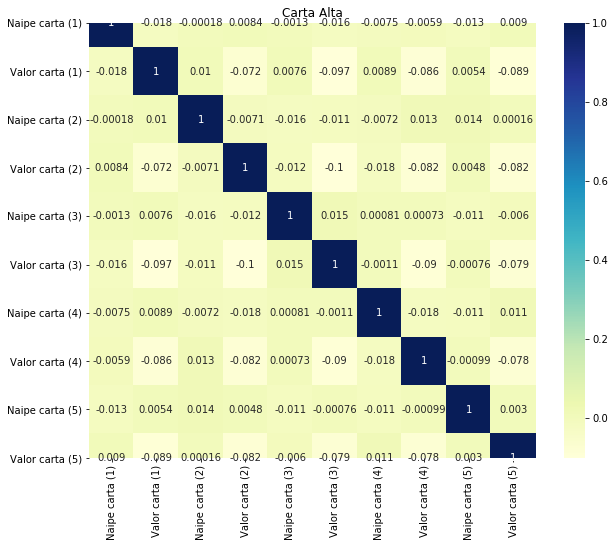

In [35]:
fig.figure(figsize = (10, 8))
sns.heatmap(t0.corr(), annot = True, cmap="YlGnBu")
fig.title('Carta Alta')
fig.show()

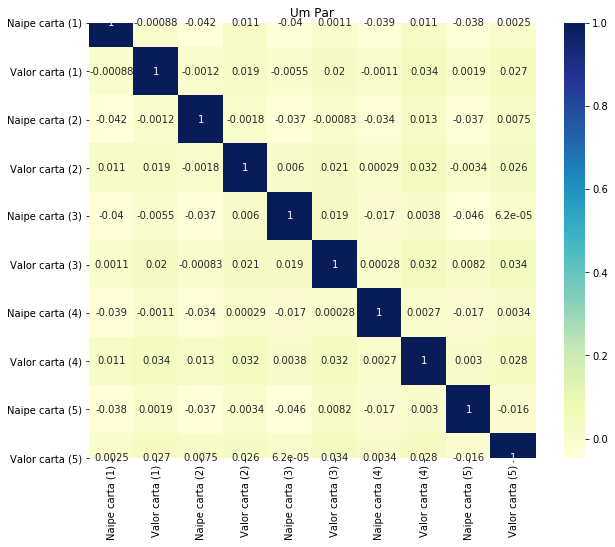

In [36]:
fig.figure(figsize = (10, 8))
sns.heatmap(t1.corr(), annot = True, cmap="YlGnBu")
fig.title('Um Par')
fig.show()

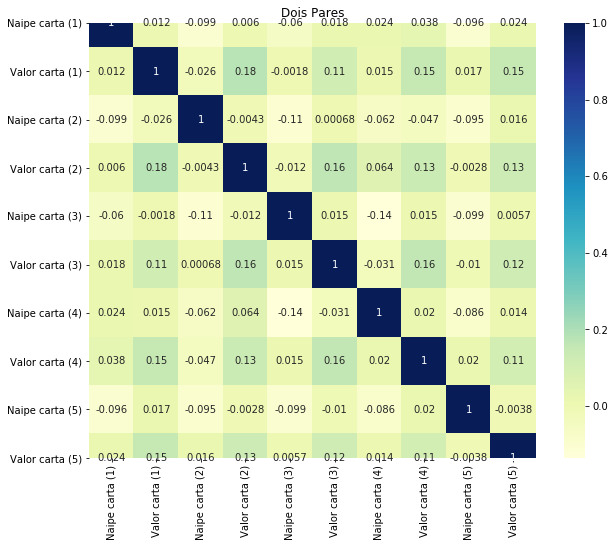

In [37]:
fig.figure(figsize = (10, 8))
sns.heatmap(t2.corr(), annot = True, cmap="YlGnBu")
fig.title('Dois Pares')
fig.show()

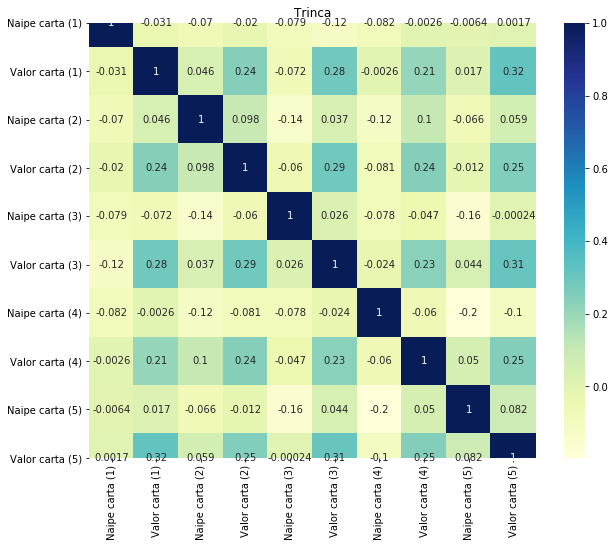

In [38]:
fig.figure(figsize = (10, 8))
sns.heatmap(t3.corr(), annot = True, cmap="YlGnBu")
fig.title('Trinca')
fig.show()

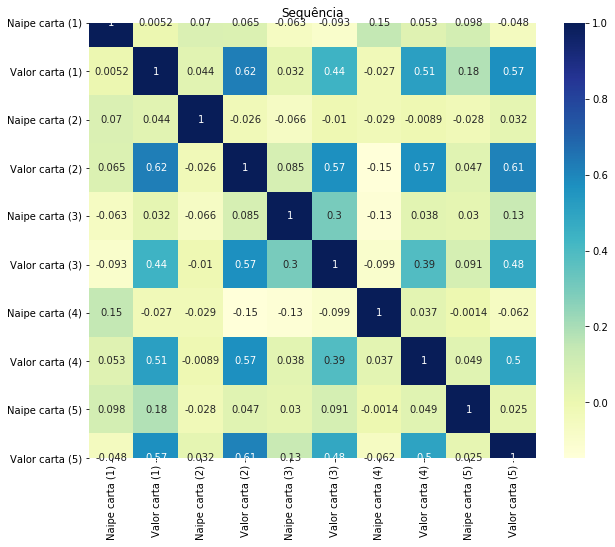

In [39]:
fig.figure(figsize = (10, 8))
sns.heatmap(t4.corr(), annot = True, cmap="YlGnBu")
fig.title('Sequência')
fig.show()

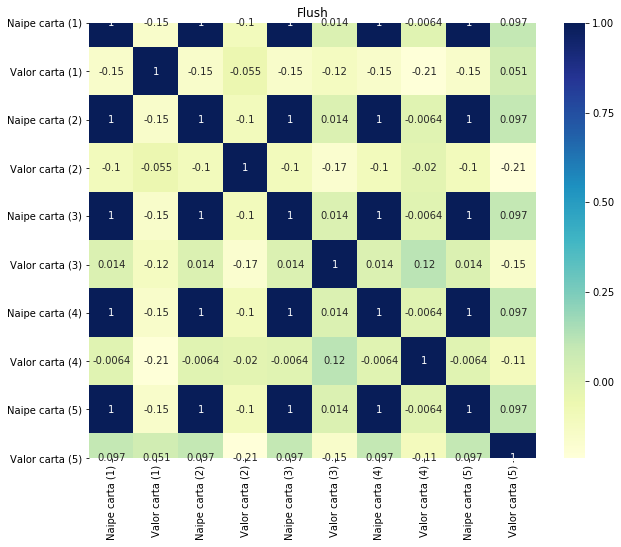

In [40]:
fig.figure(figsize = (10, 8))
sns.heatmap(t5.corr(), annot = True, cmap="YlGnBu")
fig.title('Flush')
fig.show()

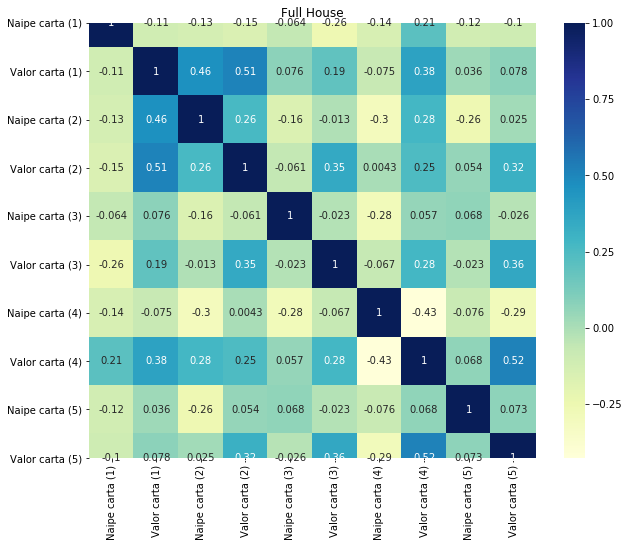

In [41]:
fig.figure(figsize = (10, 8))
sns.heatmap(t6.corr(), annot = True, cmap="YlGnBu")
fig.title('Full House')
fig.show()

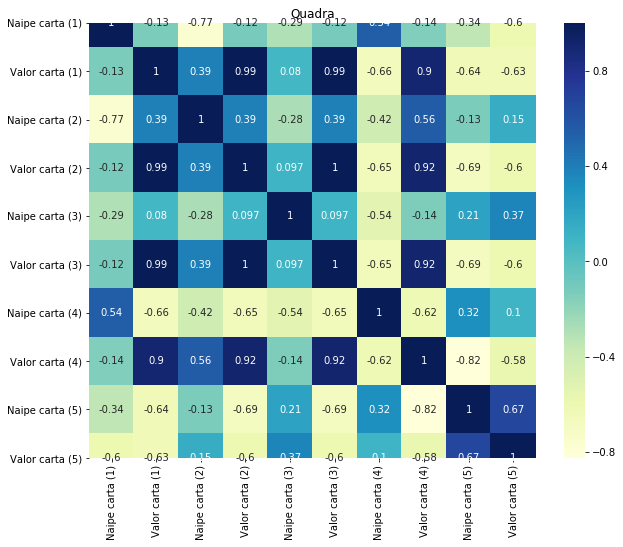

In [42]:
fig.figure(figsize = (10, 8))
sns.heatmap(t7.corr(), annot = True, cmap="YlGnBu")
fig.title('Quadra')
fig.show()

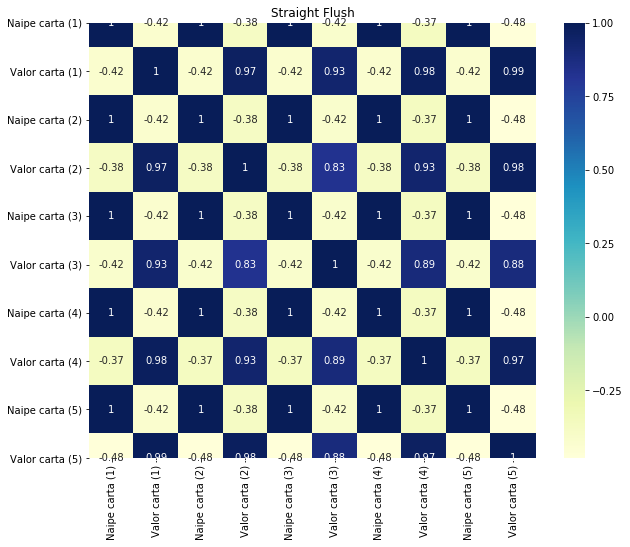

In [43]:
fig.figure(figsize = (10, 8))
sns.heatmap(t8.corr(), annot = True, cmap="YlGnBu")
fig.title('Straight Flush')
fig.show()

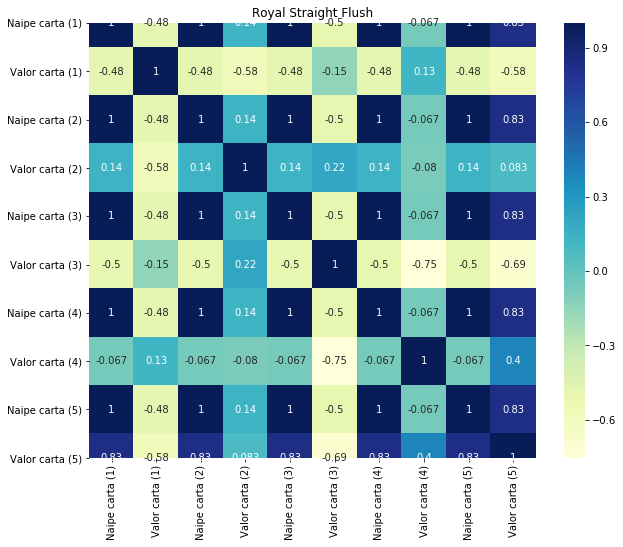

In [44]:
fig.figure(figsize = (10, 8))
sns.heatmap(t9.corr(), annot = True, cmap="YlGnBu")
fig.title('Royal Straight Flush')
fig.show()

In [55]:
treino_y=treino['Mão']
teste_y=teste['Mão']
treino_y=pd.get_dummies(treino_y)
teste_y=pd.get_dummies(teste_y)

treino_x=treino.drop('Mão',axis=1)
teste_x=teste.drop('Mão',axis=1)

In [56]:
decision_tree=DecisionTreeClassifier(random_state=0,max_depth = 2)
decision_tree=decision_tree.fit(treino_x,treino_y)
previsao_y=decision_tree.predict(teste_x)
accuracy_score(previsao_y,teste_y)

0.187661